# Using Custom Functions as a Module


## Lesson Objectives
- Move custom functions to .py file
- Add the .py file to your PYTHONPATH (so it can be accessed anywhere on your PC)
- Importing your custom module so that it auto-reloads when edited.

## Modules Revisited

A module is simply a python file (.py) that contains functions and classes to be imported and used in Python notebooks/files. e.g. `import pandas as pd`

A .py file that will be used as a module should:
- Include the imports for every package used in the .py file
- Only include static code (do not run the functions, just define them)


# How to Save Python Functions as Modules 



### Importing Custom Modules Locally

>  ***What is the simplest way to save python functions so that they can be reused almost anywhere, without actually publishing a python package?***

The simplest way to save Python functions so that they can be reused almost anywhere is to put them into a .py file (often referred to as a Python module) and import this file when you need the functions.

Here's a step-by-step guide:

1. **Create a Python module**. Let's say you have a function to add two numbers:

   ```python
   def add_two_numbers(a, b):
       return a + b
   ```

   Save this function in a .py file. For example, save it as `my_functions.py`.

2. **Use the function in another script**. You can import this module into another Python script like this:

   ```python
   import my_functions as mf
   
   result = mf.add_two_numbers(1, 2)
   print(result)  # Output: 3
   ```

   Note: The Python script and `my_functions.py` should be in the same directory for this to work. If they're not, you'd need to adjust the system's PYTHONPATH to include the directory where your module resides.




### Update Custom Functions while using in a notebook



> ***How can I import my custom my_functions module in a Jupyter Notebook in a way that lets me continue to edit the .py file and have the module automatically reload itself with the updated code?***

If you're actively developing and changing a Python module, and you want those changes to be immediately available in your Jupyter Notebook, you can use the `autoreload` extension from IPython.

Here's a step-by-step guide:

1. **Load the `autoreload` extension**. In your Jupyter notebook, run the following code:

   ```python
   %load_ext autoreload
   ```

2. **Set autoreload mode**.
   - `%autoreload 2`: Reloads all modules  every time before executing the Python code typed.


   ```python
   %autoreload 2
   ```

3. **Import your module**. Now, you can import your module:

   ```python
   import my_functions as mf
   ```

**Combined, the code would would look like the following (note that the extension is loaded *before* the import):**

  ```python
  %load_ext autoreload
  %autoreload 2
  import my_functions as mf
  ```

With this setup, changes made to the `my_functions.py` file will automatically be reflected in the Jupyter Notebook, without needing to restart the kernel or manually reimport the module. Note that this may not always work for certain types of changes, like changes to a class definition. It works best for function definitions.


One important thing to note is that while `autoreload` can be very useful during development, it might make your code behave in ways you don't expect, since the module state can change without you explicitly reloading it. Therefore, once your code is stable, it is a good practice to remove the `autoreload` statements and import your modules in the standard way.

___


In [ ]:
%load_ext autoreload
%autoreload 2
import my_functions as mf

In [ ]:
# # Adding functions to the .py file

# # Writing a demo custom function for .py file
# def demo_function(name):
#     print(f'Hello, {name}!')

# demo_function('World')

# Be sure to SAVE the .py file 

In [ ]:
# Test the new function in the module
mf.demo_function('Sarah')

### Common Issues & Gotcha's



> ***What tips or things to watch out for do you have for someone who is moving functions from their jupyter notebook to a .py file for the very first time? What are some of the common gotcha's/issues that people run into?***

Moving Python functions from a Jupyter Notebook to a .py file is generally a straightforward process, but there are some things you need to be mindful of. Here are some tips and common issues to watch out for:

1. **Hardcoded Paths**: If you have hardcoded paths for file I/O operations, these may no longer be correct when you move your function to a .py file in a different directory. Consider using relative paths or dynamically generating paths using Python's `os` module.
2. **Variable Dependencies**: In a Jupyter notebook, it's common to use globally defined variables within functions. If your function depends on global variables, ensure these are passed as arguments to the function in the .py file. Your functions should ideally not rely on global state.
3. **Order of Execution**: In Jupyter, you can run cells out of order. This can sometimes create dependencies that aren't immediately obvious. When you move your code to a .py file, everything is run sequentially from top to bottom, so you may need to rearrange your function definitions.
4. **Interactive Features**: Functions in Jupyter notebooks may leverage interactive features, such as magic commands (e.g., `%matplotlib inline`) or use `input()` to get user input. These may not work as expected in a .py file, and alternatives should be considered.
5. **Error Handling**: In a Jupyter Notebook, you may have become accustomed to writing quick-and-dirty code without much error handling, since you can interactively debug issues. In a .py file, you should add appropriate error handling to your functions.
6. **Imports**: Ensure that all necessary imports are included at the beginning of your .py file. You may have imported libraries in different cells of your notebook. It's important to consolidate these imports in your .py file.
7. **Refactoring**: This is a good opportunity to refactor your code. Make sure each function does one thing and does it well. Ensure your function names and variables are descriptive, and consider adding docstrings to your functions to explain what they do.
8. **Testing**: Make sure to test your functions after moving them to the .py file. Just because they worked in the notebook doesn't mean they'll still work in the new context.

Remember, code in a .py file should be self-contained and not depend on any hidden state, which is a common gotcha when moving from Jupyter notebooks to .py files.

# 🕹️CodeAlong Activity

- Create a custom_functions.py file in the top-level of this repository.
- Move the evaluation functions below into the .py file
- Import the custom_functions into this notebook.
- Test evaluation fucntion with the provided joblib

## 🚧Functions (To Move to .py file) 

In [ ]:

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False,values_format=".2f"):
    """Modified version of classification metrics function from Intro to Machine Learning.
    Updates:
    - Reversed raw counts confusion matrix cmap  (so darker==more).
    - Added arg for normalized confusion matrix values_format
    """
    # Get the classification report
    report = classification_report(y_true, y_pred)
    
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    
    # Create a confusion matrix  of raw counts (left subplot)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=None, 
                                            cmap='gist_gray_r',# Updated cmap
                                            values_format="d", 
                                            colorbar=colorbar,
                                            ax = axes[0]);
    axes[0].set_title("Raw Counts")
    
    # Create a confusion matrix with the data with normalize argument 
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=normalize,
                                            cmap=cmap, 
                                            values_format=values_format, #New arg
                                            colorbar=colorbar,
                                            ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

      

def evaluate_classification_network(model, 
                                    X_train=None, y_train=None, 
                                    X_test=None, y_test=None,
                                    history=None, history_figsize=(6,6),
                                    figsize=(6,4), normalize='true',
                                    output_dict = False,
                                    cmap_train='Blues',
                                    cmap_test="Reds",
                                    values_format=".2f", 
                                    colorbar=False):
    """Evaluates a neural network classification task using either
    separate X and y arrays or a tensorflow Dataset
    
    Data Args:
        X_train (array, or Dataset)
        y_train (array, or None if using a Dataset
        X_test (array, or Dataset)
        y_test (array, or None if using a Dataset)
        history (history object)
        """
    # Plot history, if provided
    if history is not None:
        plot_history(history, figsize=history_figsize)
    ## Adding a Print Header
    print("\n"+'='*80)
    print('- Evaluating Network...')
    print('='*80)
    ## TRAINING DATA EVALUATION
    # check if X_train was provided
    if X_train is not None:
        ## Check if X_train is a dataset
        if hasattr(X_train,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_train, y_train_pred = get_true_pred_labels(model, X_train)
        else:
            # Get predictions for training data
            y_train_pred = model.predict(X_train)
        ## Pass both y-vars through helper compatibility function
        y_train = convert_y_to_sklearn_classes(y_train)
        y_train_pred = convert_y_to_sklearn_classes(y_train_pred)
        
        # Call the helper function to obtain regression metrics for training data
        results_train = classification_metrics(y_train, y_train_pred, 
                                         output_dict=True, figsize=figsize,
                                             colorbar=colorbar, cmap=cmap_train,
                                               values_format=values_format,
                                         label='Training Data')
        
        ## Run model.evaluate         
        print("\n- Evaluating Training Data:")
        print(model.evaluate(X_train, return_dict=True))
    
    # If no X_train, then save empty list for results_train
    else:
        results_train = []
    ## TEST DATA EVALUATION
    # check if X_test was provided
    if X_test is not None:
        ## Check if X_train is a dataset
        if hasattr(X_test,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_test, y_test_pred = get_true_pred_labels(model, X_test)
        else:
            # Get predictions for training data
            y_test_pred = model.predict(X_test)
        ## Pass both y-vars through helper compatibility function
        y_test = convert_y_to_sklearn_classes(y_test)
        y_test_pred = convert_y_to_sklearn_classes(y_test_pred)
        
        # Call the helper function to obtain regression metrics for training data
        results_test = classification_metrics(y_test, y_test_pred, 
                                         output_dict=True, figsize=figsize,
                                             colorbar=colorbar, cmap=cmap_test,
                                              values_format=values_format,
                                         label='Test Data')
        
        ## Run model.evaluate         
        print("\n- Evaluating Test Data:")
        print(model.evaluate(X_test, return_dict=True))
      
    # If no X_test, then save empty list for results_test
    else:
        results_test = []
      
    # Store results in a dictionary
    results_dict = {'train':results_train,
                    'test': results_test}
    if output_dict == True:
        return results_dict

def plot_history(history,figsize=(6,8)):
    # Get a unique list of metrics 
    all_metrics = np.unique([k.replace('val_','') for k in history.history.keys()])
    # Plot each metric
    n_plots = len(all_metrics)
    fig, axes = plt.subplots(nrows=n_plots, figsize=figsize)
    axes = axes.flatten()
    # Loop through metric names add get an index for the axes
    for i, metric in enumerate(all_metrics):
        # Get the epochs and metric values
        epochs = history.epoch
        score = history.history[metric]
        # Plot the training results
        axes[i].plot(epochs, score, label=metric, marker='.')
        # Plot val results (if they exist)
        try:
            val_score = history.history[f"val_{metric}"]
            axes[i].plot(epochs, val_score, label=f"val_{metric}",marker='.')
        except:
            pass
        finally:
            axes[i].legend()
            axes[i].set(title=metric, xlabel="Epoch",ylabel=metric)
    # Adjust subplots and show
    fig.tight_layout()
    plt.show()

def convert_y_to_sklearn_classes(y, verbose=False):
    # If already one-dimension
    if np.ndim(y)==1:
        if verbose:
            print("- y is 1D, using it as-is.")
        return y
        
    # If 2 dimensions with more than 1 column:
    elif y.shape[1]>1:
        if verbose:
            print("- y is 2D with >1 column. Using argmax for metrics.")   
        return np.argmax(y, axis=1)
    
    else:
        if verbose:
            print("y is 2D with 1 column. Using round for metrics.")
        return np.round(y).flatten().astype(int)


def get_true_pred_labels(model,ds):
    """Gets the labels and predicted probabilities from a Tensorflow model and Dataset object.
    Adapted from source: https://stackoverflow.com/questions/66386561/keras-classification-report-accuracy-is-different-between-model-predict-accurac
    """
    y_true = []
    y_pred_probs = []
    
    # Loop through the dataset as a numpy iterator
    for images, labels in ds.as_numpy_iterator():
        
        # Get prediction with batch_size=1
        y_probs = model.predict(images, batch_size=1, verbose=0)
        # Combine previous labels/preds with new labels/preds
        y_true.extend(labels)
        y_pred_probs.extend(y_probs)
    ## Convert the lists to arrays
    y_true = np.array(y_true)
    y_pred_probs = np.array(y_pred_probs)
    
    return y_true, y_pred_probs


In [ ]:
def make_text_vectorization_layer(train_ds,  max_tokens=None, 
                                  split='whitespace',
                                  standardize="lower_and_strip_punctuation",
                                  output_mode="int",
                                  output_sequence_length=None,
                                  ngrams=None, pad_to_max_tokens=False,
                                  verbose=True,
                                  **kwargs,
                                 ):
    # Build the text vectorization layer
    text_vectorizer = tf.keras.layers.TextVectorization(
        max_tokens=max_tokens,
        standardize=standardize, 
        output_mode=output_mode,
        output_sequence_length=output_sequence_length,
        **kwargs
    )
    # Get just the text from the training data
    if isinstance(train_ds, (np.ndarray, list, tuple, pd.Series)):
        ds_texts = train_ds
    else:
        try:
            ds_texts = train_ds.map(lambda x, y: x )
        except:
            ds_texts = train_ds
            
    # Fit the layer on the training texts
    text_vectorizer.adapt(ds_texts)
    
    
    if verbose:
        # Print the params
        print( "\ntf.keras.layers.TextVectorization(" )
        config = text_vectorizer.get_config()
        pprint(config,indent=4)
        print(")")
               
    # SAVING VOCAB FOR LATER
    # Getting list of vocab 
    vocab = text_vectorizer.get_vocabulary()
    # Save dictionaries to look up words from ints 
    int_to_str  = {idx:word for idx, word in enumerate(vocab)}
    
    return text_vectorizer, int_to_str

In [ ]:
from pprint import pprint
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Testing Our Custom Module

We will test our module using the evaluate_classification function on the following model:

In [1]:
import joblib
fpath_joblib = "example-clf-model-with-data.joblib"
loaded = joblib.load(fpath_joblib)
loaded.keys()

dict_keys(['model', 'training data', 'test data'])

In [2]:
# Load the model and data to evaluate
model = loaded['model']
X_train, y_train = loaded['training data']
X_test, y_test = loaded['test data']
model

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('naivebayes', MultinomialNB())])

## Import Custom Module

In [3]:
# Load the autoreload extension and import custom module
%load_ext autoreload
%autoreload 2
import demo as fn

ModuleNotFoundError: No module named 'demo'

#### Add the Module to the Python Path

In [4]:
import sys, os
# Check sys.path for python path
sys.path

['C:\\Users\\brend\\OneDrive\\Documents\\GitHub\\adv-ml-wk02-deep-nlp-codealongs\\Lecture 1 Pt1 - Making a Custom Module',
 'C:\\Users\\brend\\anaconda3\\envs\\dojo-env\\python310.zip',
 'C:\\Users\\brend\\anaconda3\\envs\\dojo-env\\DLLs',
 'C:\\Users\\brend\\anaconda3\\envs\\dojo-env\\lib',
 'C:\\Users\\brend\\anaconda3\\envs\\dojo-env',
 '',
 'C:\\Users\\brend\\anaconda3\\envs\\dojo-env\\lib\\site-packages',
 'C:\\Users\\brend\\anaconda3\\envs\\dojo-env\\lib\\site-packages\\win32',
 'C:\\Users\\brend\\anaconda3\\envs\\dojo-env\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\brend\\anaconda3\\envs\\dojo-env\\lib\\site-packages\\Pythonwin']

We need to append the absolute filepath of the folder that contains our module.  (the folder up one level "../")

In [5]:
# Get the absolute file path of parent directory
os.path.abspath('../')

'C:\\Users\\brend\\OneDrive\\Documents\\GitHub\\adv-ml-wk02-deep-nlp-codealongs'

In [6]:
# Add parent directory to python path
sys.path.append(os.path.abspath("../"))

In [7]:
sys.path[-1]

'C:\\Users\\brend\\OneDrive\\Documents\\GitHub\\adv-ml-wk02-deep-nlp-codealongs'

In [8]:
# Now that hte path is defined, try again
%load_ext autoreload
%autoreload 2
import demo as fn


In [9]:
dir(fn)

['ConfusionMatrixDisplay',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'classification_metrics',
 'classification_report',
 'convert_y_to_sklearn_classes',
 'demo_function',
 'evaluate_classification',
 'evaluate_classification_network',
 'get_true_pred_labels',
 'make_text_vectorization_layer',
 'np',
 'plot_history',
 'plt',
 'pprint']

### Test fn.evaluate_classification

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       559
           1       0.99      0.95      0.97       559

    accuracy                           0.97      1118
   macro avg       0.97      0.97      0.97      1118
weighted avg       0.97      0.97      0.97      1118



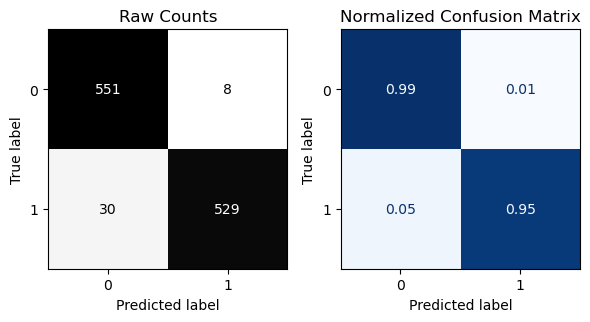


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1655
           1       0.68      0.91      0.78       253

    accuracy                           0.93      1908
   macro avg       0.83      0.92      0.87      1908
weighted avg       0.94      0.93      0.94      1908



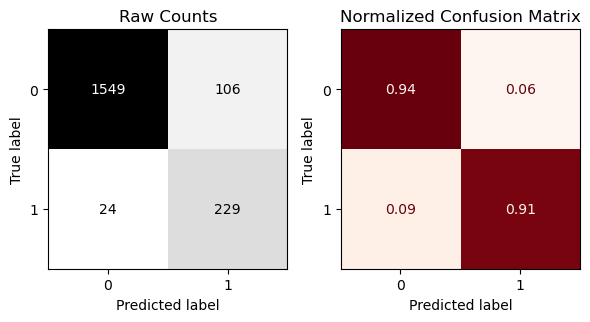

In [10]:
fn.evaluate_classification(model,X_train, y_train, X_test, y_test)


# (Bonus) Making a Package with Sub-Modules

#### [Official Packaging Tutorial](https://packaging.python.org/tutorials/packaging-projects/)
- Our module is structure like this:
```
custom_package
    └── __init__.py
    └── evaluate.py
    └── nlp.py
```

- The folder can contain other py files as well, but its needs an `__init__.py` to be recognized as a package. 
- The other py files can be import inside of `__init__.py` to make them part of the namespace\

  
```python
# Contents of __init__.py:
from . import evaluation
from . import nlp
```

In [ ]:
## Load the autoreload extension
%load_ext autoreload 
%autoreload 2

import custom_package_SOLUTION  as cp

In [ ]:
dir(cp.evaluation)

In [ ]:
dir(cp.nlp)

In [ ]:
cp.evaluation.evaluate_classification(model, X_train, y_train, X_test, y_test)

# APPENDIX

## Accessing Local Modules From Any Directory

3. **For using in different projects across your machine**, a slightly more advanced way to reuse your functions is to create a special directory (e.g., ~/my_python_modules) where you will store such .py files. Then add this directory to the PYTHONPATH environment variable:

   - **On Unix/Linux/Mac**:
     - Open your terminal.
     - Open your shell's profile script (`.bashrc`, `.bash_profile`, or `.zshrc` for Bash/Zsh).
     - Add this line to the end of the file: `export PYTHONPATH="${PYTHONPATH}:~/my_python_modules"`
     - Save and close the text editor.
     - Either source the profile script (e.g., `source ~/.bashrc`) or close and re-open your terminal.
   - **On Windows**:
     - Open System Properties/Advanced/Environment Variables.
     - Choose New under System variables.
     - Enter PYTHONPATH as the variable name and the path to the directory as the variable value.
     - Click OK until you're out of the dialog. The changes will take effect after a restart.

   Now you can import your function in any Python script across your system like this:

   ```python
   import my_functions
   
   result = my_functions.add_two_numbers(1, 2)
   print(result)  # Output: 3
   ```


## Resources


- ChatGPT Chat: https://chat.openai.com/share/d6d5daca-798a-405b-90de-8eb6e41435e1
